In [1]:
# Any copyright is dedicated to the Public Domain.
# https://creativecommons.org/publicdomain/zero/1.0/

# Joseph Catanzarite
#     Adapted from code originally written by Francois Fleuret <francois@fleuret.org>

# maintained at https://github.com/jcatanza/COVID-19.git

# Downloads data from
# https://github.com/CSSEGISandData/COVID-19/
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import os, time
import numpy as np
import csv
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import urllib.request

import requests
import pandas as pd
import io
import datetime
from parse import *
import re
from dateutil.rrule import rrule, DAILY

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

## Get the JHU timeseries data for confirmed cases and deaths

In [3]:
url1 = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
url2 = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
url_dict = {url1:'Confirmed',url2:'Deaths'}

In [4]:
cf = requests.get(url1).content
df_con = pd.read_csv(io.StringIO(cf.decode('utf-8')))
df_con.name = 'Confirmed'

dd = requests.get(url2).content
df_die = pd.read_csv(io.StringIO(dd.decode('utf-8')))
df_die.name = 'Deaths'

## Table of fractional increase in today's confirmed cases vs. yesterday's

### Helper function to extract time serise of dates

In [5]:
def get_dates(df):
    date_cols = df.columns.to_list()
    non_dates = ['Province/State', 'Country/Region', 'Lat', 'Long']
    for item in non_dates:
        date_cols.remove(item)
    return date_cols

### Table sorted by # of confirmed cases

In [6]:
# fractional increase of today's over yesterday's confirmed counts, sorted
date_cols = get_dates(df_con)
dg_con = df_con.groupby(['Country/Region'])[date_cols].sum(axis=0).sort_values(by=date_cols[-1],ascending=False)
dg_con['%increase'] = 100*(dg_con[date_cols[-1]]-dg_con[date_cols[-2]])/dg_con[date_cols[-2]]
dg_con[[date_cols[-2],date_cols[-1],'%increase']].replace([np.inf, -np.inf], np.nan).dropna().sort_values(date_cols[-1],ascending = False)

,3/31/20,4/1/20,%increase
Country/Region,,,
US,188172,213372,13.392003
Italy,105792,110574,4.520191
Spain,95923,104118,8.543311
China,82279,82361,0.099661
Germany,71808,77872,8.444742
France,52827,57749,9.317205
Iran,44605,47593,6.698801
United Kingdom,25481,29865,17.204976
Switzerland,16605,17768,7.003914


### Table sorted by %increase in confirmed cases over previous day

In [7]:
dg_con[[date_cols[-2],date_cols[-1],'%increase']].replace([np.inf, -np.inf], np.nan).dropna().sort_values('%increase',ascending = False)

,3/31/20,4/1/20,%increase
Country/Region,,,
MS Zaandam,2,9,350.000000
Niger,27,74,174.074074
Sierra Leone,1,2,100.000000
Liberia,3,6,100.000000
Guyana,12,19,58.333333
Bahamas,14,21,50.000000
Benin,9,13,44.444444
India,1397,1998,43.020759
Kenya,59,81,37.288136


### Fractional increase of today's over yesterday's deaths, sorted
Note that deaths have dates in mm/dd/yy format, while confirmed has dates in mm/dd/yyyy format

In [8]:
date_cols = get_dates(df_die)
dg_die = df_die.groupby(['Country/Region'])[date_cols].sum(axis=0).sort_values(by=date_cols[-1],ascending=False)
dg_die['%increase'] = 100*(dg_die[date_cols[-1]]-dg_die[date_cols[-2]])/dg_die[date_cols[-2]]
dg_die[[date_cols[-2],date_cols[-1],'%increase']].replace([np.inf, -np.inf], np.nan).dropna().sort_values(date_cols[-1],ascending = False)

,3/31/20,4/1/20,%increase
Country/Region,,,
Italy,12428,13155,5.849694
Spain,8464,9387,10.905009
US,3873,4757,22.824684
France,3532,4043,14.467724
China,3309,3316,0.211544
Iran,2898,3036,4.761905
United Kingdom,1793,2357,31.455661
Netherlands,1040,1175,12.980769
Germany,775,920,18.709677


## Time series plot helper function

In [9]:
def plot_timeseries(df,data_path):
    
    cum_switch = True
    date_cols = df.columns.to_list()
    non_dates = ['Province/State', 'Country/Region', 'Lat', 'Long']
    for item in non_dates:
        date_cols.remove(item)

    dg = df.groupby(['Country/Region'])[date_cols].sum(axis=0).sort_values(by=date_cols[-1],ascending=False)
            
    # account for different date format 
    try:
        dates = [datetime.datetime.strptime(col,'%m/%d/%Y') for col in dg.columns]
    except:
        dates = [datetime.datetime.strptime(col,'%m/%d/%y') for col in dg.columns]
        
    myFmt = mdates.DateFormatter('%b %d')

    fig = plt.figure(figsize=(10,6))
    ax = fig.add_subplot(1, 1, 1)
    ax.xaxis_date()
    ax.yaxis.grid(color='gray', linestyle='-', linewidth=0.25)
    ax.set_title('Cumulative number of COVID-19 cases: ' + df.name+' '  + str(df_die.columns[-1]))
    ax.set_xlabel('Date', labelpad = 10)
    ax.set_ylabel('Counts', labelpad = 10)
    ax.set_yscale('log')
    ax.xaxis.set_major_formatter(myFmt)
    
    # matplotlib list of named colors
    # https://matplotlib.org/3.1.0/gallery/color/named_colors.html
    
    for key, color, label in [
            ('Germany', 'blue', 'Germany'),
            ('Spain', 'red', 'Spain'),
            ('France', 'lightgreen', 'France'),
            ('US', 'black', 'USA'),
            ('Korea, South', 'gray', 'South Korea'),
            ('Italy', 'purple', 'Italy'),
            ('China', 'orange', 'China'),
            ('Iran', 'cyan', 'Iran'),
            ('Switzerland', 'magenta', 'Switzerland'),
            ('Norway', 'salmon', 'Norway'),
            ('United Kingdom', 'cornflowerblue', 'United Kingdom'),
            ('Netherlands', 'maroon', 'Netherlands'),
            ('Sweden', 'turquoise', 'Sweden'),
        

    ]:
        if(cum_switch):
            ax.plot(dates, dg.loc()[key], color = color, label = label, linewidth=2)
        else:
            # daily cases -- TBD
            ax.plot(dates, dg.loc()[key][1:] - dg.loc()[key][:-2], color = color, label = label, linewidth=2)
            xx = zip( (dg.loc()[key][1:], dg.loc()[key][:-2]) )
            
    ax.legend(frameon = True)
    plt.xticks(rotation = 75)
    plt.grid(True)
    plt.show()
    
    # make a name for the plot, and save the figure
    last_date = date_cols[-1].replace('/', '-',2) 
    png_name = data_path + 'COVID-19-' + df.name + '-' + last_date + '.png'
    fig.savefig(png_name)


## Plot  `Confirmed`, `Deaths`, and `Recoveries`  timeseries

Confirmed


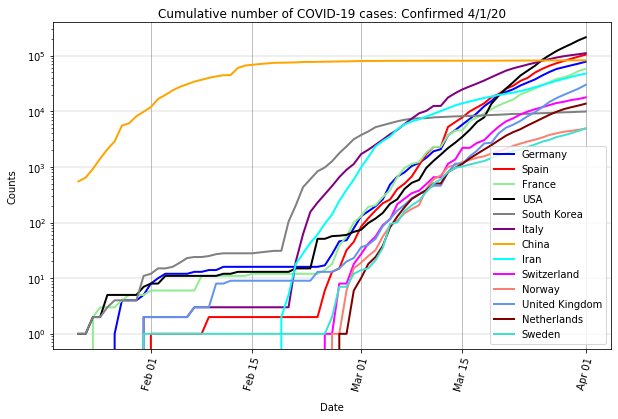

Deaths


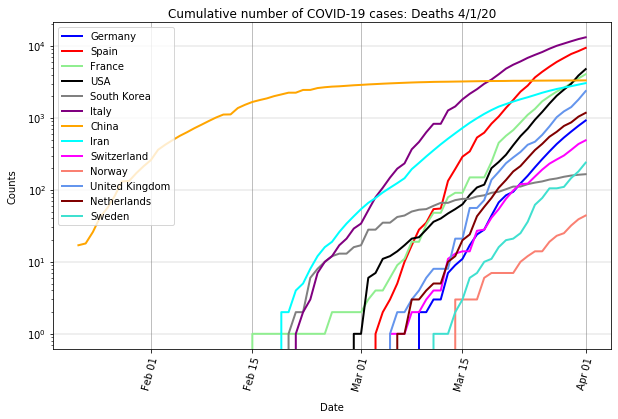

In [10]:
data_path = 'C:/Users/cross-entropy/Documents/github_projects/covid-19/data/'
for df in [df_con, df_die]:
    print(df.name)
    plot_timeseries(df,data_path)

### Corner case, 3/25/2020

In [11]:
# df_con has a new row for West Bank and Gaza confirmed cases, 
#     while df_die does not, because there are not yet any deaths reported for West Bank and Gaza
min_deaths = 15
print(df_die.shape, df_con.shape)
df_con = df_con[df_con[df_con.columns[1]] != 'The West Bank and Gaza']

num = df_die[df_die[df_die.columns[-1]] > min_deaths][df_die.columns[-1]]
den = df_con[df_die[df_die.columns[-1]] > min_deaths][df_con.columns[-1]]
print(len(num))

(256, 75) (256, 75)
56


In [12]:
df_die

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,2,4,4,4,4,4,4,4
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,2,2,2,2,2,4,5,5,6,8,10,10,11,15,15
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,3,4,4,4,7,9,11,15,17,17,19,21,25,26,29,31,35,44,58
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,3,3,3,6,8,12,14
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,2
5,NaN,Antigua and Barbuda,17.060800,-61.796400,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,NaN,Argentina,-38.416100,-63.616700,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,2,2,2,2,2,2,3,3,4,4,4,6,8,9,13,18,19,23,27,28
7,NaN,Armenia,40.069100,45.038200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,3,3,3,4
8,Australian Capital Territory,Australia,-35.473500,149.012400,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1
9,New South Wales,Australia,-33.868800,151.209300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,2,2,2,2,2,2,2,2,2,4,5,5,6,6,6,6,7,7,7,7,8,8,8,8,9


### Mortality Rate of Confirmed cases

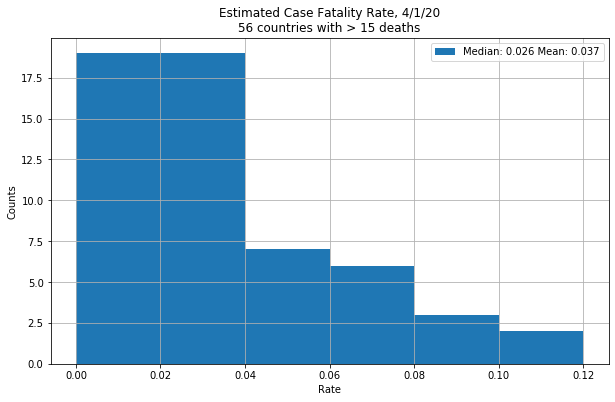

In [13]:
rates = num/den
# bins = [0.005, 0.015, 0.025, 0.035, 0.045, 0.055, 0.065, 0.075, 0.085, 0.095, 0.105]
bins = [0,  0.02,  0.04,  0.06,  0.08,  0.10, 0.12]
fig = plt.figure(figsize=(10,6))
plt.hist(rates,bins = bins)
plt.ylabel("Counts")
plt.xlabel("Rate")
plt.title("Estimated Case Fatality Rate, " + str(df_die.columns[-1]) + "\n" + str(len(rates)) +  " countries with > 15 deaths")
plt.legend(["Median: "+str(round(1000*np.median(rates))/1000)+" Mean: "+str(round(1000*np.mean(rates))/1000)])
plt.grid()

date_label = date_cols[-1].replace('/','-')
png_name = data_path + 'estimated_CFR-'+date_label+'.png'
fig.savefig(png_name)

### Estimates of Case Fatality Rate (CFR)

In [14]:
# Median CFR
print(np.median(rates))
# Mean CFR
print(np.mean(rates))
# Weighted average CFR, weighting by #of deaths
print(sum(rates[num>15]*num[num>15])/sum(num[num>15]))

0.026490279617629158
0.036697808071883574
0.07792265774315191
